In [1]:
import pandas as pd

def minmax(dataset):
  minmax = list()
  for i in range(len(dataset[0])):
    value_min = dataset[:, i].min()
    value_max = dataset[:, i].max()
    minmax.append([value_min, value_max])
  return minmax


def normalize(dataset, minmax):
  for row in dataset:
    for i in range(len(row)):
      if i == len(row) - 1:
        continue
      row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
  return dataset


def factorize(dataset, features):
  for feature in features:
    dataset[feature] = pd.factorize(dataset[feature])[0]

In [2]:
dataset = pd.read_csv('cars.csv').iloc[:, 1:]
print(dataset.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model.year  \
0  18.0          8         307.0      130.0    3504          12.0          70   
1  15.0          8         350.0      165.0    3693          11.5          70   
2  18.0          8         318.0      150.0    3436          11.0          70   
3  16.0          8         304.0      150.0    3433          12.0          70   
4  17.0          8         302.0      140.0    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
dataset = dataset.replace('?', None).dropna()
factorize(dataset, ['origin'])
dataset = dataset.apply(pd.to_numeric)
min_max = minmax(dataset.values)
dataset = pd.DataFrame(normalize(dataset.values, min_max))
print(dataset.head())

          0    1         2         3         4         5    6    7
0  0.239362  1.0  0.617571  0.456522  0.536150  0.238095  0.0  0.0
1  0.159574  1.0  0.728682  0.646739  0.589736  0.208333  0.0  0.0
2  0.239362  1.0  0.645995  0.565217  0.516870  0.178571  0.0  0.0
3  0.186170  1.0  0.609819  0.565217  0.516019  0.238095  0.0  0.0
4  0.212766  1.0  0.604651  0.510870  0.520556  0.148810  0.0  0.0


In [4]:
from subprocess import Popen, PIPE, STDOUT
import os

def run(isOneHot, tail):
  args = ["java", "-jar", "kotlin.jar"]
  my_env = os.environ.copy()
  my_env["JAVA_HOME"] = "/home/Valeriy.Teplyakov/JBJDK-11"
  p = Popen(args, stdout=PIPE, stdin=PIPE, stderr=STDOUT, env=my_env)
  input = str(len(dataset)) + " " + str(len(dataset.values[0]) - 1)
  for row in dataset.values:
    loc_inp = ""
    for i in range(len(row)):
      loc_inp += str(row[i]) + " "
    input += "\n" + loc_inp
  if (isOneHot):
    input += "\ntrue"
  else:
    input += "\nfalse"
  input += "\n" + tail
  p_stdout = p.communicate(input=bytes(input, encoding='utf-8'))[0]
  return p_stdout.decode('utf-8').strip()

In [5]:
bestCommon = run(False, "check_all")
print(bestCommon)

Micro
0.781322354608018
MANHATTAN
UNIFORM
Variable with 1 neighbors

Macro
0.7798963770920363
MANHATTAN
UNIFORM
Variable with 1 neighbors


In [17]:
outCommonMicro = run(False, "check_by_type\n" + "\n".join(bestCommon.split()[2:5]))
outCommonMacro = run(False, "check_by_type\n" + "\n".join(bestCommon.split()[10:13]))
print("\n".join(outCommonMicro.split("\n")[:3]))
print("\n")
print("\n".join(outCommonMacro.split("\n")[:3]))

0.781322354608018 0.7798963770920363
0.7577641459747233 0.7494039700531515
0.7334977488284409 0.7121602994977784


0.781322354608018 0.7798963770920363
0.7577641459747233 0.7494039700531515
0.7334977488284409 0.7121602994977784


In [13]:
bestOneHot = run(True, "check_all")
print(bestOneHot)

Micro
0.7931403985621478
MANHATTAN
UNIFORM
Variable with 2 neighbors

Macro
0.7827715646217313
MANHATTAN
TRICUBE
Variable with 12 neighbors


In [14]:
outOneHotMicro = run(True, "check_by_type\n" + "\n".join(bestOneHot.split()[2:5]))
outOneHotMacro = run(True, "check_by_type\n" + "\n".join(bestOneHot.split()[10:13]))
print("\n".join(outOneHotMicro.split("\n")[:3]))
print("\n")
print("\n".join(outOneHotMacro.split("\n")[:3]))

0.781322354608018 0.7798963770920363
0.7931403985621478 0.7814122659825682
0.7509204972693526 0.7461480175963836


0.781322354608018 0.7798963770920363
0.781322354608018 0.7798963770920363
0.7757181502892744 0.7745591210233816


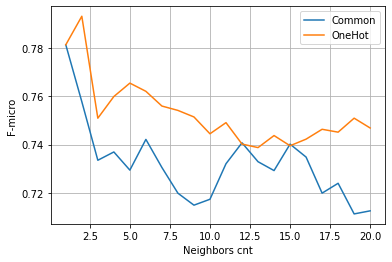

In [23]:
from matplotlib import pyplot as plt

commonData = list(map(float, outCommonMicro.split()))
oneHotData = list(map(float, outOneHotMicro.split()))
commonFMicro = [commonData[i] for i in range(0, len(commonData), 2)]
oneHotFMicro = [oneHotData[i] for i in range(0, len(oneHotData), 2)]

_, ax = plt.subplots(1, 1)
ax.plot(range(1, 21), commonFMicro[:20], label='Common')
ax.plot(range(1, 21), oneHotFMicro[:20], label='OneHot')
ax.set_xlabel('Neighbors cnt')
ax.set_ylabel('F-micro')
ax.legend()
ax.grid()

In [1]:
from matplotlib import pyplot as plt

commonData = list(map(float, outCommonMacro.split()))
oneHotData = list(map(float, outOneHotMacro.split()))
commonFMacro = [commonData[i] for i in range(1, len(commonData), 2)]
oneHotFMacro = [oneHotData[i] for i in range(1, len(oneHotData), 2)]

_, ax = plt.subplots(1, 1)
ax.plot(range(1, 21), commonFMacro[:20], label='Common')
ax.plot(range(1, 21), oneHotFMacro[:20], label='OneHot')
ax.set_xlabel('Neighbors cnt')
ax.set_ylabel('F-macro')
ax.legend()
ax.grid()

NameError: name 'outCommonMacro' is not defined